In [3]:
import xarray as xr
import numpy as np
import dask
from tqdm import tqdm
import pandas as pd
import xwmb
import xwmt
import xgcm
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import regionate
import matplotlib.pyplot as plt

In [2]:
xwmb.__version__, xwmt.__version__, xgcm.__version__

('0.1.0', '0.1.1', '0.8.2.dev15+g7492277')

In [6]:
wmt_mhw = xr.open_dataset('/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/0186-0189_wmt-mhw26-daily.nc')
wmt = xr.open_dataset('/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/0186-0189_wmt-daily.nc')

In [56]:
mt_path = "/pub/mariant3/WarmWaterMasses/notebooks/02_mhw_metrics/data_ocetrac-labels/"
blobs = xr.open_dataset(f"{mt_path}/01860503-01901020_ocetrac-labels-region.nc")
labels = blobs.blobs
df = pd.read_pickle(f"{mt_path}/01860503-01901020_mhw-metrics-region.pkl")

In [46]:
df.date[4];

<Figure size 1000x500 with 0 Axes>

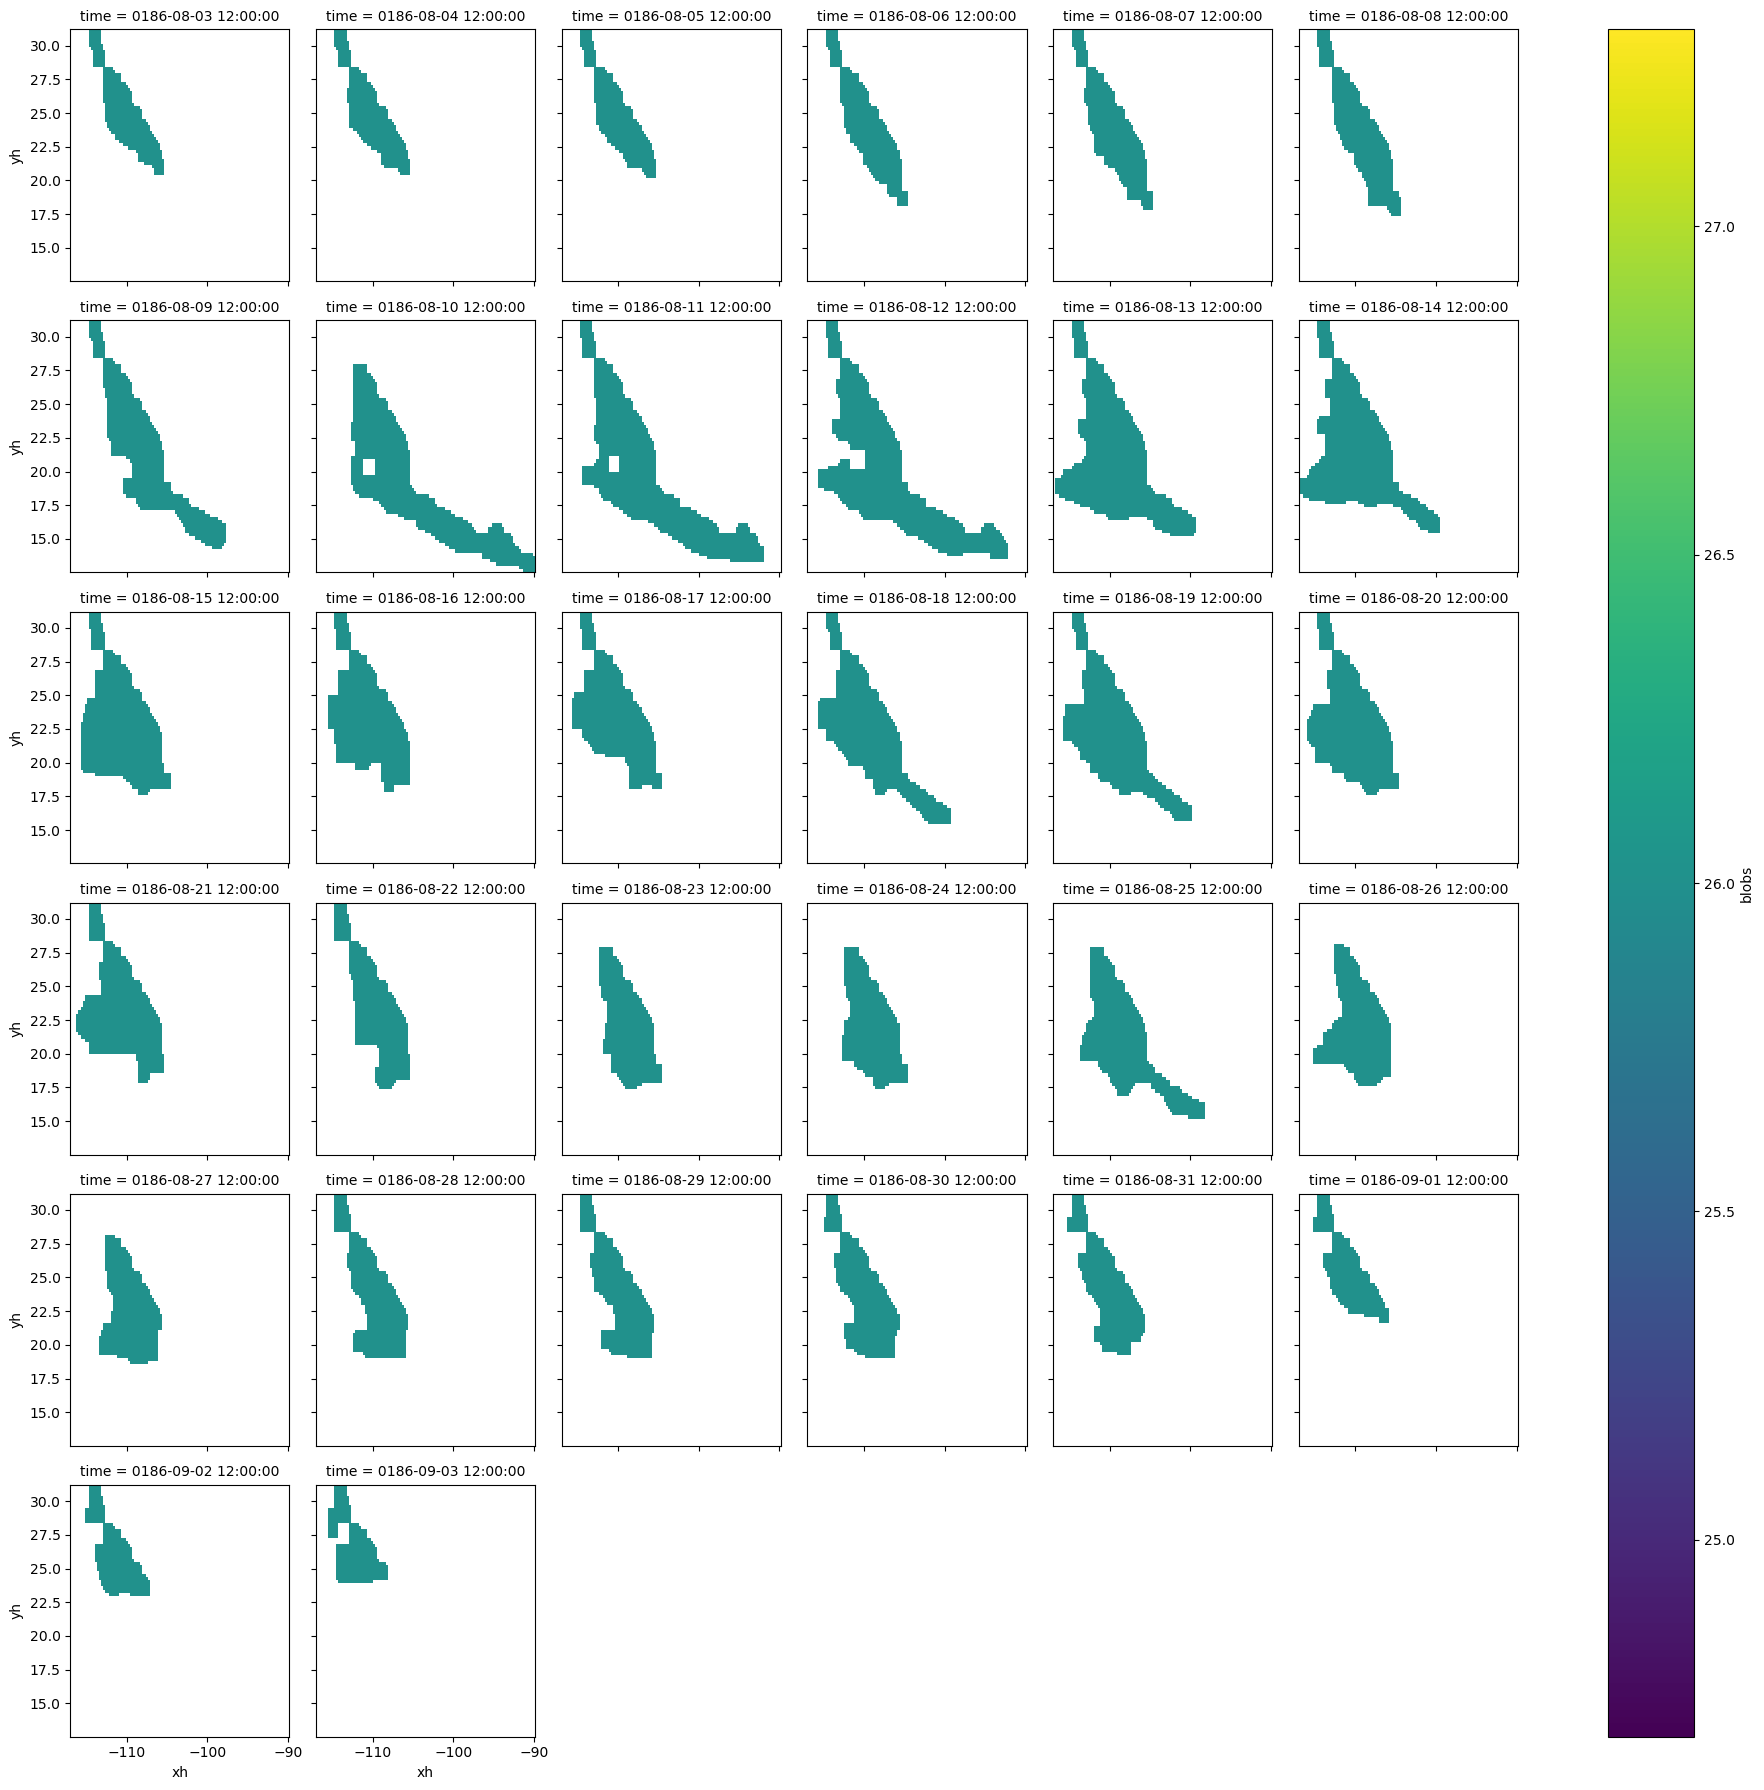

In [78]:
plt.figure(figsize=(10, 5))
event.blobs.plot(col="time",col_wrap=6)
plt.show()

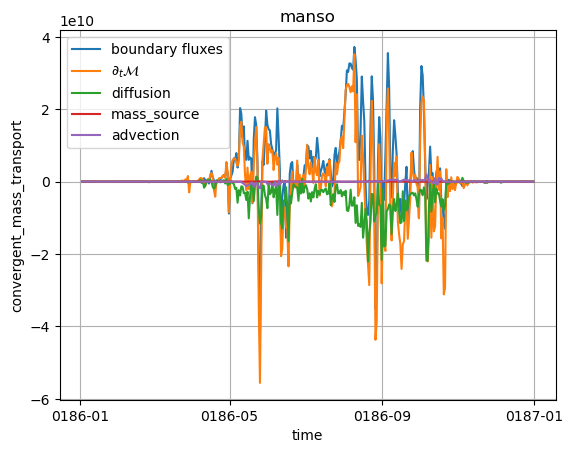

In [12]:
(-wmt.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186'))).boundary_fluxes.plot(label='boundary fluxes')
wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).mass_tendency.plot(label=r"$\partial_{t} \mathcal{M}$")
(-wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).diffusion).plot(label=r"diffusion")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).advection.plot(label=r"advection")
wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).mass_source.plot(label=r"mass_source")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).Leibniz_material_derivative.plot(label='Leibniz_material_derivative')
wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).convergent_mass_transport.plot(label='advection')

plt.legend()
plt.title('manso')
plt.grid(True)
plt.show()

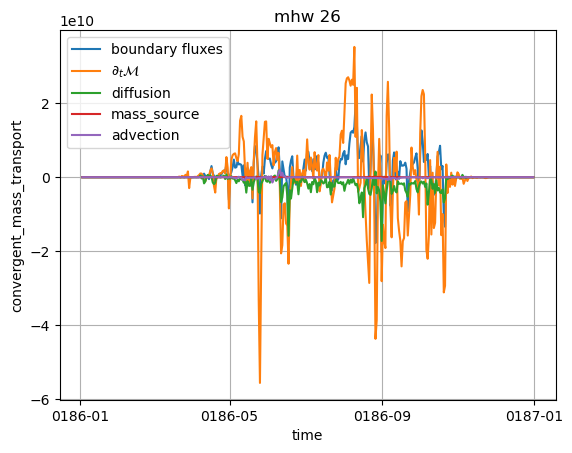

In [11]:
(-wmt_mhw.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186'))).boundary_fluxes.plot(label='boundary fluxes')
wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).mass_tendency.plot(label=r"$\partial_{t} \mathcal{M}$")
(-wmt_mhw.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).diffusion).plot(label=r"diffusion")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).advection.plot(label=r"advection")
wmt_mhw.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).mass_source.plot(label=r"mass_source")
#wmt.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).Leibniz_material_derivative.plot(label='Leibniz_material_derivative')
wmt_mhw.sel(thetao_l_target=29,method='nearest').sel(time=slice('0186','0186')).convergent_mass_transport.plot(label='advection')

plt.legend()
plt.grid(True)
plt.title('mhw 26')
plt.show()

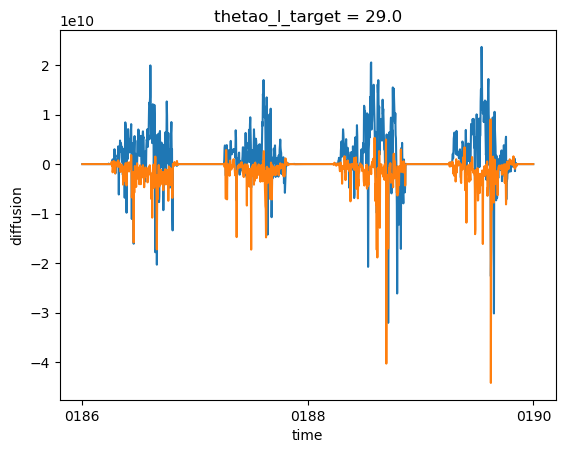

In [23]:
(-wmt_mhw.sel(thetao_l_target=29, method='nearest').boundary_fluxes).plot(label='boundary fluxes')
(-wmt_mhw.sel(thetao_l_target=29,method='nearest')).diffusion.plot()

In [14]:
wmt

<xarray.Dataset>
Dimensions:                                    (time: 1459,
                                                thetao_i_target: 441,
                                                time_bounds: 1459, xh: 269,
                                                yh: 130, thetao_l_target: 440)
Coordinates:
  * time                                       (time) object 0186-01-02 12:00...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-01-0...
  * xh                                         (xh) float64 -137.9 ... -69.91
  * yh                                         (yh) float64 10.2 10.44 ... 39.07
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
    geolat                                     (yh, xh) float32 ...
    geolon                                     (yh, xh) float32 ...
    areacello                                  (yh, xh) float32 ...
    deptho                                     (yh, xh) float32 ...
    lon                                        (yh, xh) float32 ...
    lat                                        (yh, xh) float32 ...
Data variables: (12/21)
    Eulerian_tendency                          (time, thetao_l_target) float64 ...
    bottom_flux                                (time, thetao_l_target) float64 ...
    frazil_ice                                 (time, thetao_l_target) float64 ...
    surface_ocean_flux_advective_negative_lhs  (time, thetao_l_target) float64 ...
    surface_ocean_flux_advective_negative_rhs  (time, thetao_l_target) float64 ...
    surface_exchange_flux                      (time, thetao_l_target) float64 ...
    ...                                         ...
    mass_tendency                              (time, thetao_l_target) float64 ...
    dt                                         (time) float64 ...
    Leibniz_material_derivative                (time, thetao_l_target) float64 ...
    spurious_numerical_mixing                  (time, thetao_l_target) float64 ...
    advection_plus_BC                          (time, thetao_l_target) float64 ...
    diabatic_advection                         (time, thetao_l_target) float64 ...

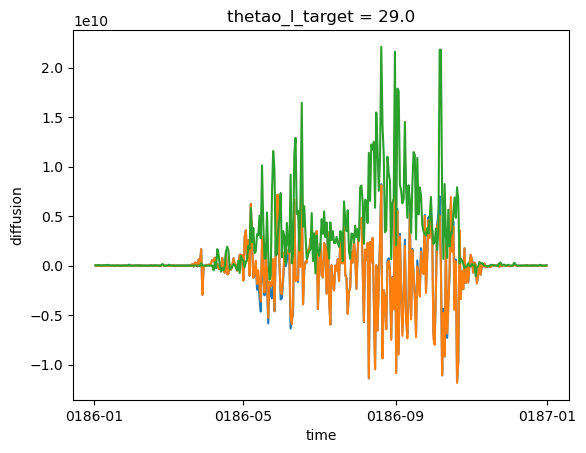

In [15]:
(wmt.boundary_fluxes+wmt.diffusion+wmt.mass_tendency).sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()
(-wmt.spurious_numerical_mixing.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186'))).plot()
wmt.diffusion.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()

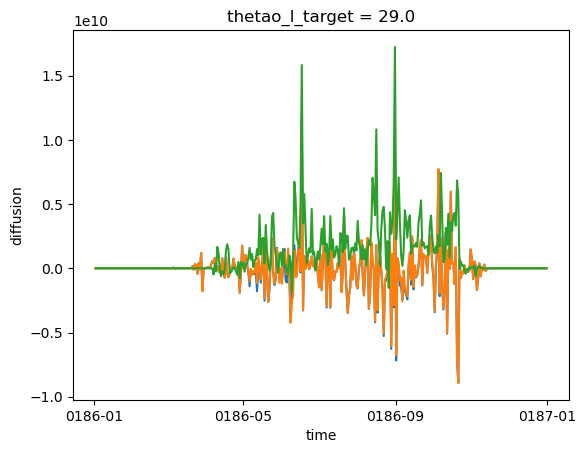

In [16]:
(wmt_mhw.boundary_fluxes+wmt_mhw.diffusion+wmt_mhw.mass_tendency).sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()
(-wmt_mhw.spurious_numerical_mixing.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186'))).plot()
wmt_mhw.diffusion.sel(thetao_l_target=29, method='nearest').sel(time=slice('0186','0186')).plot()